# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Оглавление: <a id="toc"></a>

1. [Открытие данных](#start)
2. [Предобработка](#15)
3. [Анализ данных](#25)
3. [Анализ данных №2](#35)
4. [Проверка гипотез](#45)
5. [Вывод](#55)

### Раздел 1 <a id="start"></a>

[в начало](#toc)

- 1. [Открытие данных](#1)  
   - 1.1 [Загрузка библиотек](#1.1)
   - 1.2 [Загрузка датасетов](#1.2)
   - 1.3 [Изучение информарции и подготовка данных](#1.3)

### Раздел 2 <a id="15"></a>

[в начало](#toc)

- 2. [Преработка](#2)
    - 2.1 [Замена названия столбцов](#2.1)
    - 2.2 [Преобразование данных в нужный тип](#2.2)
    - 2.3 [Обработка пропусков](#2.3)
    - 2.4 [Расчет суммарных продаж во всех регионах](#2.4)

### Раздел 3 <a id="25"></a>

[в начало](#toc)

+ 3. [Анализ данных](#3)
   + 3.1 [Количество выпусков игр в разные годы](#3.1)
   + 3.2 [Платформы с наибольшими суммарными продажами](#3.2) 
      - 3.2.1 [Графики топ-5 платформ](#3.2.1)
   + 3.3 [Платформы актуального периода](#3.3)
   + 3.4 [Лидеры продаж актуального года](#3.4)
      - 3.4.1 [Графики топ-5 платформ актуального года](#3.4.1)
   + 3.5 [Графики «ящик с усами» по глобальным продажам игр в разбивке по платформам](#3.5)
   + 3.6 [Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков](#3.6)
      - 3.6.1 [Корреляцию между отзывами и продажами для платформы PS3](#3.6.1)
   + 3.7 [Влияние на продажи других популярных платформ отзывы пользователей и критиков](#3.7)
   + 3.8 [Распределение игр по жанрам](#3.8)


### Раздел 4 <a id="35"></a>

[в начало](#toc)

+ 4. [Анализ данных №2](#4)
    + 4.1 [Самые популярные платформы](#4.1)
        - 4.1.1 [Самые популярные платформы NA](#4.1.1)
        - 4.1.2 [Самые популярные платформы EU](#4.1.2)
        - 4.1.2 [Самые популярные платформы JP](#4.1.3)
    + 4.2 [Самые популярные жанры (топ-5)](#4.2)
        - 4.2.1 [Самые популярные жанры (топ-5) NA](#4.2.1)
        - 4.2.2 [Самые популярные жанры (топ-5) EU](#4.2.2)
        - 4.2.3 [Самые популярные жанры (топ-5) JP](#4.2.3)
    + 4.3 [Влияние рейтинга ESRB на продажи](#4.3)
        - 4.3.1 [Влияние рейтинга ESRB на продажи для NA](#4.3.1)
        - 4.3.2 [Влияние рейтинга ESRB на продажи для EU](#4.3.2)
        - 4.3.3 [Влияние рейтинга ESRB на продажи для JP](#4.3.3)

### Раздел 5 <a id="45"></a>

[в начало](#toc)

+ [5. Проверка гипотез](#5)
    + [5.1 Гипотеза №1](#5.1)
    + [5.2 Гипотеза №2](#5.2)

### Раздел 6 <a id="55"></a>

[в начало](#toc)

+ 6. [Вывод](#6)

## Раздел 1 <a id="1"></a>

### 1.1 Загрузка библиотек <a id="1.1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import math
import pylab as pl

### 1.2 Загрузка датасета <a id="1.2"></a>

In [2]:
data = pd.read_csv("/datasets/games.csv")

### 1.3 Изучение информарции и подготовка данных <a id="1.3"></a>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод** Название столбцов нужно привести к нижнему регистру. Год привести к типу int. Другие преобразование необходимо анализировать.

## Раздел 2

### 2.1 Замена названия столбцов <a id="2.1"></a>

In [5]:
data.columns = data.columns.str.lower()

In [6]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 2.2 Преобразование данных в нужный тип <a id="2.2"></a>

Поменяем тип данных столбцов 'year_of_release' и 'critic_score', так как год и оценка критиков указывается в целых числах.

In [7]:
# Изменения типа столбца 'year_of_release' на Int64
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
# Изменения типа столбца 'user_score' на float
data['critic_score'] = data['critic_score'].astype('Int64')

In [9]:
data.info()
#display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### 2.3 Обработка пропусков <a id="2.3"></a>

Проверим количество 'to be defined'

In [10]:
user = data.pivot_table(index='user_score', values='name', aggfunc='count')
display(user)

,name
user_score,
0,1
0.2,2
0.3,2
0.5,2
0.6,2
...,...
9.4,11
9.5,6
9.6,2


 'to be defined' составляет 2424 строк, поэтому их не будем дропать и заменим на nan

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# Изменения типа столбца 'critic_score' на Int64
data['user_score'] = data['user_score'].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Проверим дубликаты

In [12]:
data.duplicated().sum()

0

**Вывод** Изменили тип данных 'year_of_release', 'user_score' и 'critic_score' на Int64. Поменяли 'tbd' на 'nan'.

### 2.4 Расчет суммарных продаж во всех регионах <a id="2.4"></a>

In [13]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Суммарные продажи по играм во всех регионах нашли.

## Раздел 3 <a id="3"></a>

### 3.1 Количество выпусков игр в разные годы <a id="3.1"></a>

<Figure size 648x360 with 0 Axes>

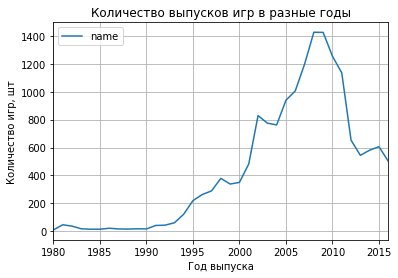

In [14]:
games = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
#display(games)
plt.figure(figsize=(9,5))
games.plot(y='name', grid=True)
plt.title('Количество выпусков игр в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, шт')
plt.show()

**Вывод** С 1990г. начинается рост выпусков игр, поэтому игры выпущенные до 1990г не будут учитываться.

In [15]:
data = data.query('year_of_release >= 1990')

### 3.2  Платформы с наибольшими суммарными продажами <a id="3.2"></a>

In [16]:
platforms_top = (data.pivot_table(index='platform', values='sales', aggfunc='sum')
                 .sort_values(by='sales', ascending = False))
platforms_top.head(5)

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


**Вывод** Платформы с наибольшими суммарными продажами: *PS2, X360 и PS3*. Построим для них гистрограммы

#### 3.2.1 Графики топ-5 платформ <a id="3.2.1"></a>

In [17]:
platforms_top_five = data.query('platform == ["PS2", "X360","PS3", "Wii", "DS"]')
platforms_top_five = platforms_top_five.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc='sum').reset_index()
#display(pstwo)

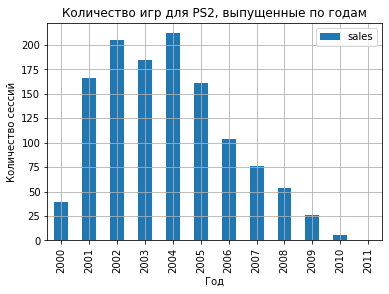

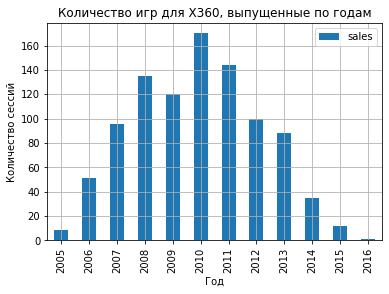

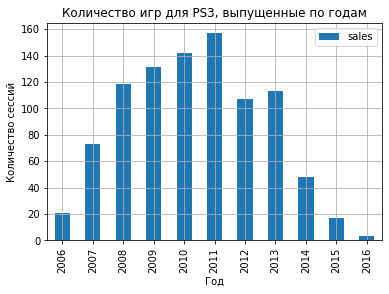

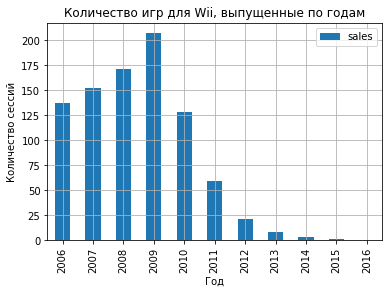

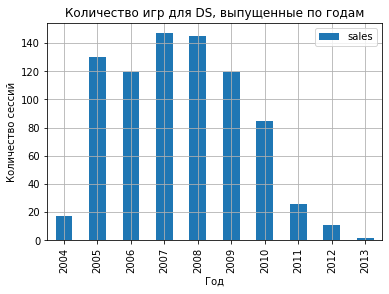

In [18]:
name_platforms = ["PS2", "X360","PS3", "Wii", "DS"]

for i in name_platforms:
    #plt.figure(figsize=(9,5))
    platforms_top_five[platforms_top_five['platform'] == i].plot(x='year_of_release', y='sales', kind='bar', grid=True)
    plt.title('Количество игр для ' + str(i) + ', выпущенные по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество сессий')
    plt.show()

<b>Вывод</b> 
Выберем актуальнный год с 2010г., часть продаж с популярных платформ топ-5 не будет учиываться. Так как жихненый цикл платформы составляет около 10 лет, то в 2017 г. увидем потенциальные платформы с ростом продаж и маленьким жизненым циклом или наоборот платформы с большими продажами, но подающими продажи на 2-4 года.

<b>Тренд.</b> Общий тренд продаж на консолях уменьшается, это свзяно с тем, что выпускают много интересных и красивых игр на ПК и смартформы.

### 3.3  Платформы актуального периода <a id="3.3"></a>

<Figure size 648x360 with 0 Axes>

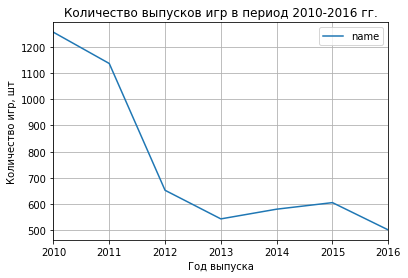

In [19]:
data_current = data.query('year_of_release >= 2010')

# Проверка выбора актуального периода
games_current = data_current.pivot_table(index='year_of_release', values='name', aggfunc='count')

# График платформ актуального года
plt.figure(figsize=(9,5))
games_current.plot(y='name', grid=True)
plt.title('Количество выпусков игр в период 2010-2016 гг.')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, шт')
plt.show()

Проверка успешно выполнена.

### 3.4  Лидеры продаж актуального года <a id="3.4"></a>

In [20]:
platforms_leader = (data_current.pivot_table(index='platform', values='sales', aggfunc='sum')
                 .sort_values(by='sales', ascending = False))
platforms_leader.head(5)

,sales
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97


#### 3.4.1 Графики топ-5 платформ актуального года <a id="3.4.1"></a>

In [21]:
platforms_current = data_current.query('platform == ["PS3","X360", "PS4", "3DS", "Wii"]')
platforms_current = platforms_current.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc='sum').reset_index()
#display(platforms_current)

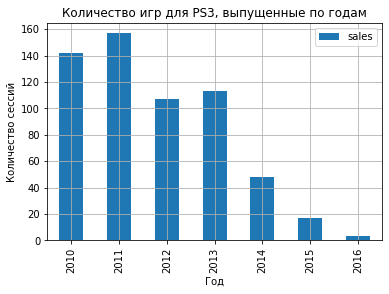

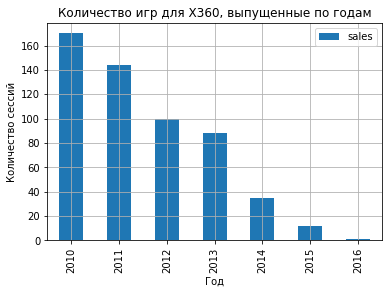

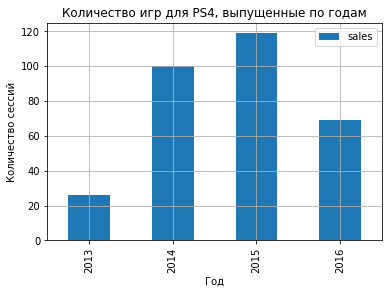

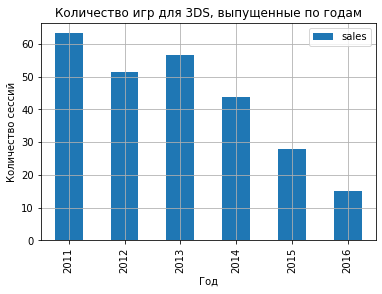

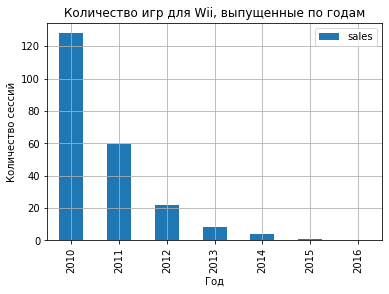

In [22]:
name_platform = ["PS3","X360", "PS4", "3DS", "Wii"]

for i in name_platform:
    #plt.figure(figsize=(9,5))
    platforms_current[platforms_current['platform'] == i].plot(x='year_of_release', y='sales', kind='bar', grid=True)
    plt.title('Количество игр для ' + str(i) + ', выпущенные по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество сессий')
    plt.show()

<b>Вывод</b>

Потенциальными прибыльными платформами являются PS3 и PS4, потому что PS3 является лидером по продажам, но с 2013г. продажи падают,а PS4 является перспектиной платформой у которой продажи начались только в 2013г, а уже входит в топ-3 и является заменой устаревающей платформы PS3.

### 3.5 Графики «ящик с усами» по глобальным продажам игр в разбивке по  <a id="3.5"></a>

(0, 3)

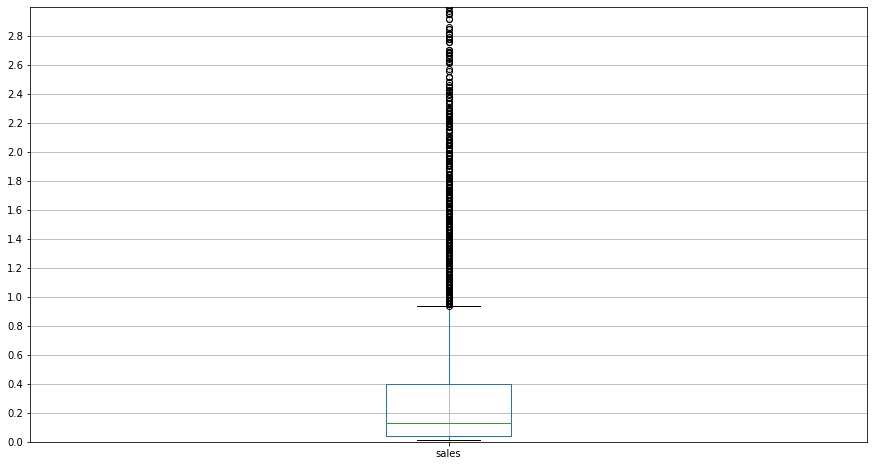

In [23]:
ax = data_current.boxplot(column='sales', figsize=(15,8))
pl.yticks(np.arange(0, 3, 0.2))
plt.ylim(0, 3)


**Вывод** В среднем, продажи игр составляют до 1 млн копий. Медиана - до 0,2 миллиона копий.

### 3.6 Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков <a id="3.6"></a>

In [24]:
platform_ps3 = data_current.query('platform == "PS3"')

#platform_x360 = platform_x360.query('critic_score != "NaN"') # не работает

# Уберем пропуски
platform_ps3['critic_score'] = platform_ps3['critic_score'].fillna(-1)
platform_ps3 = platform_ps3.query('critic_score != -1')

# Уберем пропуски
platform_ps3['user_score'] = platform_ps3['user_score'].fillna(-1)
platform_ps3 = platform_ps3.query('user_score != -1')



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


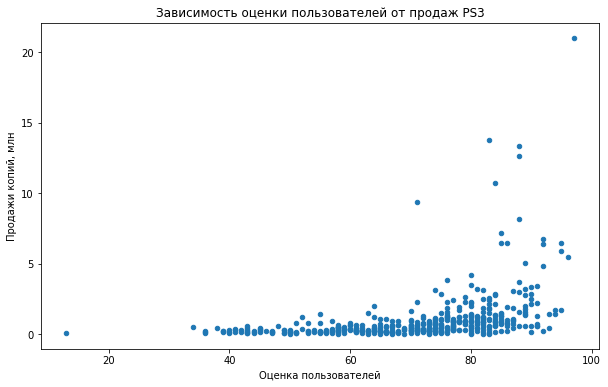

In [25]:
platform_ps3.plot(kind='scatter', x='critic_score', y='sales', figsize=(10,6))
plt.title('Зависимость оценки пользователей от продаж PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи копий, млн')
plt.show()

#### 3.6.1 Корреляцию между отзывами и продажами для платформы PS3 <a id="3.6.1"></a>

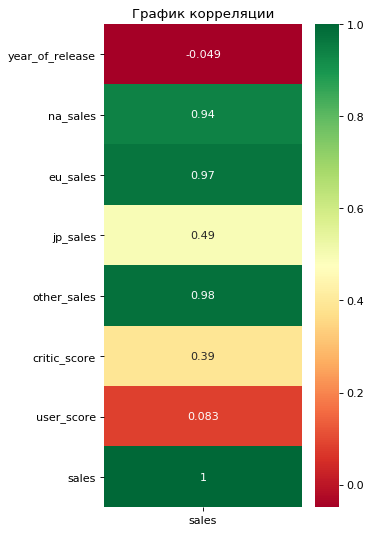

In [26]:
plt.figure(figsize=(4,8), dpi= 80)
sns.heatmap(platform_ps3.corr()[['sales']], cmap='RdYlGn', annot=True)
plt.title('График корреляции')
plt.show()

In [27]:
# Корреляция между 'critic_score' и 'user_score' (заработал каким-то чудом)
games_ps3_filtered = platform_ps3[['critic_score', 'sales']]
display(games_ps3_filtered.corr()) # заработал

,critic_score,sales
critic_score,1.000000,0.393604
sales,0.393604,1.000000


### 3.7 Влияние на продажи других популярных платформ отзывы пользователей и критиков <a id="3.7"></a>

In [28]:
# Уберем пропуски
data_current['critic_score'] = data_current['critic_score'].fillna(-1)
data_current = data_current.query('critic_score != -1')

# Уберем пропуски
data_current['user_score'] = data_current['user_score'].fillna(-1)
data_current = data_current.query('user_score != -1')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


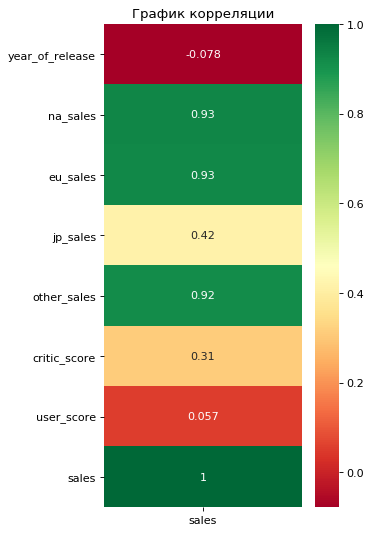

In [29]:
plt.figure(figsize=(4,8), dpi= 80)
sns.heatmap(data_current.corr()[['sales']], cmap='RdYlGn', annot=True)
plt.title('График корреляции')
plt.show()

In [30]:
games_filtered = data_current[['critic_score', 'sales']]
display(games_filtered.corr())

,critic_score,sales
critic_score,1.000000,0.311028
sales,0.311028,1.000000


**Вывод** Для платформы кореляция между продажи и оценками равняется 0,39, а для других платформ кореляция между продажи и оценками равняется 0,31. 

### 3.8 Распределение игр по жанрам <a id="3.8"></a>

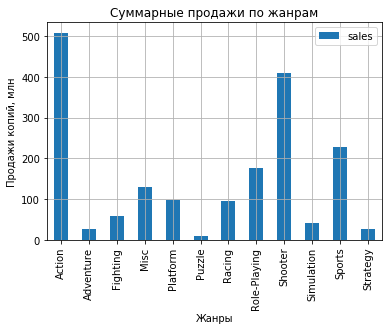

In [31]:
genre_current = data_current.pivot_table(index=['genre'], values='sales', aggfunc='sum').reset_index()
genre_current.plot(x='genre', y='sales', grid=True, kind='bar')
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи копий, млн')
plt.show()

**Вывод** Лидеры продажи по жанрам: Action, Shooter и Sports.

## Раздел 4 <a id="4"></a>

### 4.1 Самые популярные платформы <a id="4.1"></a>

#### 4.1.1 Самые популярные платформы (топ-5) NA <a id="4.1.1"></a>

In [32]:
na_sales = (data_current.pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='na_sales', ascending=False)[:5])

na_sales['na'] = (na_sales['na_sales'] / na_sales['na_sales'].sum() * 100)
display(na_sales)

,platform,na_sales,na
10,X360,286.03,41.114577
4,PS3,190.64,27.403010
5,PS4,84.46,12.140465
11,XOne,76.03,10.928718
8,Wii,58.53,8.413230


#### 4.1.2 Самые популярные платформы (топ-5) EU <a id="4.1.2"></a>

In [33]:
eu_sales = (data_current.pivot_table(index=['platform'], values='eu_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='eu_sales', ascending=False)[:5])

eu_sales['na'] = (eu_sales['eu_sales'] / eu_sales['eu_sales'].sum() * 100)
display(eu_sales)

,platform,eu_sales,na
4,PS3,171.07,32.651932
10,X360,137.78,26.297908
5,PS4,112.44,21.461292
2,PC,60.40,11.528478
11,XOne,42.23,8.060391


#### 4.1.3 Самые популярные платформы (топ-5) JP <a id="4.1.3"></a>

In [34]:
jp_sales = (data_current.pivot_table(index=['platform'], values='jp_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='jp_sales', ascending=False)[:5])

jp_sales['na'] = (jp_sales['jp_sales'] / jp_sales['jp_sales'].sum() * 100)
display(jp_sales)

,platform,jp_sales,na
4,PS3,37.69,37.257809
0,3DS,33.87,33.481613
9,WiiU,10.17,10.053381
8,Wii,10.00,9.885330
5,PS4,9.43,9.321866


<b>Вывод.</b> 

В Северной Америке популярной платформой являетяся X360 с долей продажей от популярных платформ 41,1%. В Европе популярной платформой являетяся PS3 с долей продажей от популярных платформ 32,65%. В Японии популярной платформой являетяся PS3 с долей продажей от популярных платформ 37,26%.

### 4.2 Самые популярные жанры (топ-5) <a id="4.2"></a>

#### 4.2.1 Самые популярные жанры (топ-5) NA <a id="4.2.1"></a>

In [35]:
na_sales = (data_current.pivot_table(index=['genre'], values='na_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='na_sales', ascending=False)[:5])

display(na_sales)

,genre,na_sales
0,Action,226.58
8,Shooter,203.92
10,Sports,113.16
7,Role-Playing,76.62
3,Misc,72.57


#### 4.2.2 Самые популярные жанры (топ-5) EU <a id="4.2.2"></a>

In [36]:
eu_sales = (data_current.pivot_table(index=['genre'], values='eu_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='eu_sales', ascending=False)[:5])

display(eu_sales)

,genre,eu_sales
0,Action,187.93
8,Shooter,145.37
10,Sports,81.61
7,Role-Playing,50.73
6,Racing,43.23


#### 4.2.3 Самые популярные жанры (топ-5) JP <a id="4.2.3"></a>

In [37]:
jp_sales = (data_current.pivot_table(index=['genre'], values='jp_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='jp_sales', ascending=False)[:5])

display(jp_sales)

,genre,jp_sales
0,Action,31.81
7,Role-Playing,30.41
4,Platform,13.69
8,Shooter,11.90
3,Misc,8.95


<b>Вывод.</b> 

В Северной Америке, Европе и в Японии популярным жанром является Action.

### 4.3 Влияние рейтинга ESRB на продажи <a id="4.3"></a>

In [38]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)'}
data_current['ESRB_description'] = data_current[data_current['rating'].notnull()]['rating'].map(ESRB_dict)
#display(data_current['ESRB_description'])

#### 4.3.1 Влияние рейтинга ESRB на продажи для NA <a id="4.3.1"></a>

In [39]:
na_espb = (data_current.pivot_table(index=['ESRB_description'], values='na_sales', aggfunc='sum')
           .reset_index()
           .sort_values(by='na_sales', ascending=False))

display(na_espb)

,ESRB_description,na_sales
1,> 17 лет,366.82
3,Для всех,203.45
0,13-19 лет,143.37
2,>10 лет,126.86


#### 4.3.2 Влияние рейтинга ESRB на продажи для EU <a id="4.3.2"></a>

In [40]:
eu_espb = (data_current.pivot_table(index=['ESRB_description'], values='eu_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='eu_sales', ascending=False))

display(eu_espb)

,ESRB_description,eu_sales
1,> 17 лет,280.94
3,Для всех,165.25
0,13-19 лет,104.36
2,>10 лет,80.09


#### 4.3.3 Влияние рейтинга ESRB на продажи для JP <a id="4.3.3"></a>

In [41]:
jp_espb = (data_current.pivot_table(index=['ESRB_description'], values='jp_sales', aggfunc='sum')
            .reset_index()
            .sort_values(by='jp_sales', ascending=False))

display(jp_espb)

,ESRB_description,jp_sales
3,Для всех,45.96
0,13-19 лет,37.00
1,> 17 лет,29.15
2,>10 лет,12.86


<b>Вывод.</b> 

Для Японии больше всего выпускают игра для категории "для всех", в Европе и Севрной Америке больше уделяют вниманию возрастной категории и поэтому больше категории "> 17 лет".

<b>Пользовательские портреты</b>

- *Пользовательский портрет Северной Америки* - лидером по продажам является платформа X360 с долей продажей среди популярных платформ 36,7%, популярный жанр - Action, больше всего продаж игр для возрастной категории "> 17 лет". 
- *Пользовательский портрет Европы* - лидером по продажам является платформа PS3 с долей продажей среди популярных платформ 32,65%, популярный жанр - Action, больше всего продаж игр для возрастной категории "> 17 лет".
- *Пользовательский портрет Японии* - лидером по продажам является платформа PS3 с долей продажей среди популярных платформ 37,26%, популярный жанр - Action, больше всего продаж игр для возрастной категории "Для всех". 

## Раздел 5 <a id="5"></a>

### 5.1 Гипотеза №1 <a id="5.1"></a>

- H0: средний пользовательский рейтинг платформ XOne и PC одинаковый
- H1: средний пользовательский рейтинг платформ XOne и PC различается

In [42]:
xbox_one_ratings = data_current[(data_current['platform'] == 'XOne') & (data_current['user_score'] > 0)]['user_score']
pc_ratings = data_current[(data_current['platform'] == 'PC') & (data_current['user_score'] > 0)]['user_score']


# Дисперсия

print('Дисперсия пользовательского рейтинга платформы XOne', xbox_one_ratings.var())
print('Дисперсия пользовательского рейтинга платформы PC', pc_ratings.var())

# Equal_var будет False, так как дисперсии разные и точность теста будет выше.


results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var = False)
alpha = 0.05
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия пользовательского рейтинга платформы XOne 1.79639911308204
Дисперсия пользовательского рейтинга платформы PC 2.396561330285866
p-значение: 0.9127457287129067
Не получилось отвергнуть нулевую гипотезу


In [43]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.54
Средняя оценка пользователей игр для платформы PC - 6.52


### 5.2 Гипотеза №2 <a id="5.2"></a>

- Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [44]:
action_ratings = data_current[(data_current['genre'] == 'Action') & (data_current['user_score'] > 0)]['user_score']
pc_ratings = data_current[(data_current['genre'] == 'Sports') & (data_current['user_score'] > 0)]['user_score']

# Дисперсия

print('Дисперсия пользовательского рейтинга жанра Action', action_ratings.var())
print('Дисперсия пользовательского рейтинга жанра Sports', pc_ratings.var())

# Equal_var будет False, так как дисперсии разные и точность теста будет выше.




results = st.ttest_ind(action_ratings, pc_ratings, equal_var = False)
alpha = 0.05
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия пользовательского рейтинга жанра Action 1.7496609297725023
Дисперсия пользовательского рейтинга жанра Sports 2.0008554233393916
p-значение: 8.946726392719975e-10
Отвергаем нулевую гипотезу


## Вывод <a id="6"></a>

- При обработке данных изменили тип данных 'year_of_release', 'user_score' и 'critic_score' на Int64. Поменяли 'tbd' на 'nan'.
- С 1990г. являются платформы с наибольшими суммарными продажами: *PS2, X360 и PS3*.
- Актуальнный год начинается с 2010г., потому что жизненый цикл платформ составляет около 10 лет, а в 2017 г. увидем потенциальные платформы с ростом продаж и маленьким жизненым циклом или наоборот платформы с большими продажами.
- Потенциальными прибыльными платформами являются *PS3* и *PS4*, потому что *PS3* является лидером по продажам, но с 2013г. продажи падают,а *PS4* является перспектиной платформой у которой продажи начались только в 2013г, а уже входит в топ-3 и является заменой устаревающей платформы *PS3*.
- Для платформы кореляция между продажи и оценками равняется 0,39, а для других платформ кореляция между продажи и оценками равняется 0,31.
- Лидеры продажи по жанрам: Action, Shooter и Sports.
- *Пользовательский портрет Северной Америки* - лидером по продажам является платформа X360 с долей продажей среди популярных платформ 41,1%, популярный жанр - Action, больше всего продаж игр для возрастной категории "> 17 лет". 
- *Пользовательский портрет Европы* - лидером по продажам является платформа PS3 с долей продажей среди популярных платформ 32,65%, популярный жанр - Action, больше всего продаж игр для возрастной категории "> 17 лет".
- *Пользовательский портрет Японии* - лидером по продажам является платформа PS3 с долей продажей среди популярных платформ 37,26%, популярный жанр - Action, больше всего продаж игр для возрастной категории "Для всех". 